# Import Libraries

In [47]:
# The Python package for scientific computing
import numpy as np

# A module for handling data
import pandas as pd

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The Decision Tree classifier from the sklearn library
from sklearn.tree import DecisionTreeClassifier, plot_tree

# The RadnomForest classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, roc_auc_score

# Load The Data

## Training Data

### Reading Training data

In [2]:
# load the dataset
train_data = pd.read_csv("Census_income_train.csv")

In [3]:
# inspect the dataset
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (32560, 15) 



### Data Visualization For Training Data

In [5]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=train_data[X].value_counts().index, y=train_data[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

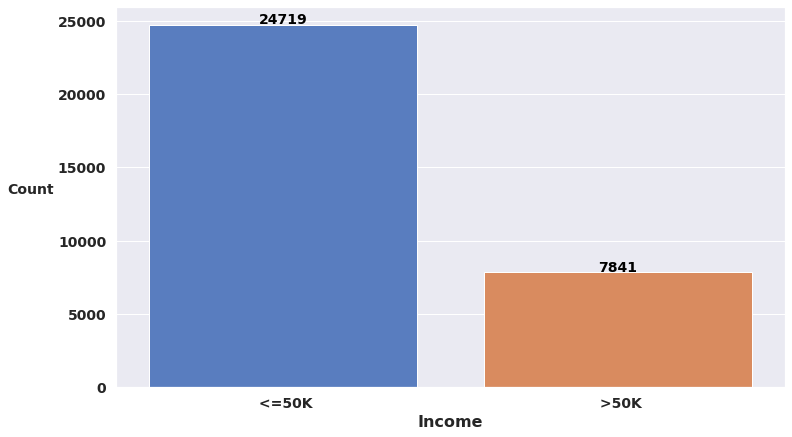

In [6]:
dist_plot("Income")

### Data Preprocessing For Training Data

In [7]:
# No null or NaN values
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### Removing rows with unknown values ('?')

> All missing or unknow values, however, are marked with a question mark (?)

> There are 3 columns which contain '?' - Workclass, Occupation, Native-country

In [8]:
# Let's start with the Workclass column
# We can obtain a list of boolean values indicating whether there is a '?' on the current row
train_data["Workclass"].str.contains("\?").sum()

1836

In [9]:
# Take the subset of the dataframe rows which don't contain '?'
train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [10]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (30724, 15) 



In [11]:
# Let's do the same for 'Occupation'
train_data = train_data[train_data["Occupation"].str.contains("\?") == False]

In [12]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (30717, 15) 



In [13]:
# And for 'Native-country'
train_data = train_data[train_data["Native-country"].str.contains("\?") == False]

In [14]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (30161, 15) 



In [15]:
# Finally, let's reset the index
train_data = train_data.reset_index(drop=True)

#### Creating dummy variables and separating inputs and targets

 - In the original data, there are both categorical and numerical data
 - Decision trees and random forest can work with categorical data in general However, this is not implemented in sklearn So, we need to convert the categorical data to numerical We will do that with one hot encoding

In [16]:
# Pandas can automatically do that for us with '.get_dummies'
train_data = pd.get_dummies(train_data, drop_first=False)

In [17]:
train_data.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# The last 2 columns are whether the income <= 50k and whether it is >50k
# Both of these carry the same information, so we will remove one of them
train_data = train_data.drop(['Income_ <=50K'],axis=1)

In [19]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (30161, 104) 



#### Removing all duplicates data

In [20]:
train_data.duplicated().sum()

23

In [21]:
train_data = train_data.drop_duplicates()

In [22]:
train_data.duplicated().sum()

0

In [23]:
print('Shape of the train_data:', train_data.shape,'\n')

Shape of the train_data: (30138, 104) 



### split the data into `[train_input, train_target]` For Training Data

In [24]:
# The input features are everything besides the last column
train_input = train_data.iloc[:,:-1]

# The target/output is just the last column
train_target = train_data.iloc[:,-1]

In [25]:
print('Shape of the train_input:', train_input.shape,'\n')
print('Shape of the train_target:', train_target.shape,'\n')

Shape of the train_input: (30138, 103) 

Shape of the train_target: (30138,) 



## Testing Data

### Reading test data

In [26]:
# load the dataset
test_data = pd.read_csv("Census_income_test.csv")

In [27]:
# inspect the dataset
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [28]:
print('Shape of the test_data:', test_data.shape,'\n')

Shape of the test_data: (16281, 15) 



### Data Visualization For Testing Data

In [29]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=test_data[X].value_counts().index, y=test_data[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

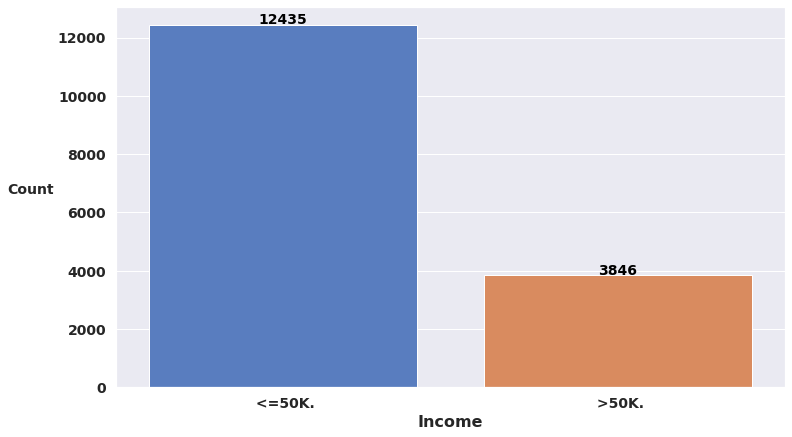

In [30]:
dist_plot("Income")

### Data Preprocessing For Testing Data

In [31]:
# No null or NaN values
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### Removing rows with unknown values ('?')

> All missing or unknow values, however, are marked with a question mark (?)

> There are 3 columns which contain '?' - Workclass, Occupation, Native-country

In [32]:
# Let's start with the Workclass column
# We can obtain a list of boolean values indicating whether there is a '?' on the current row
test_data["Workclass"].str.contains("\?").sum()

963

In [33]:
# Take the subset of the dataframe rows which don't contain '?'
test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [34]:
print('Shape of the test_data:', test_data.shape,'\n')

Shape of the test_data: (15318, 15) 



In [35]:
# Let's do the same for 'Occupation'
test_data = test_data[test_data["Occupation"].str.contains("\?") == False]

In [36]:
print('Shape of the test_data:', test_data.shape,'\n')

Shape of the test_data: (15315, 15) 



In [37]:
# And for 'Native-country'
test_data = test_data[test_data["Native-country"].str.contains("\?") == False]

In [38]:
print('Shape of the test_data:', test_data.shape,'\n')

Shape of the test_data: (15060, 15) 



In [39]:
# Finally, let's reset the index
test_data = test_data.reset_index(drop=True)

#### Creating dummy variables and separating inputs and targets

 - In the original data, there are both categorical and numerical data
 - Decision trees and random forest can work with categorical data in general However, this is not implemented in sklearn So, we need to convert the categorical data to numerical We will do that with one hot encoding

In [40]:
# Pandas can automatically do that for us with '.get_dummies'
test_data = pd.get_dummies(test_data, drop_first=False)

In [41]:
test_data.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [43]:
# The last 2 columns are whether the income <= 50k and whether it is >50k
# Both of these carry the same information, so we will remove one of them
test_data = test_data.drop(['Income_ <=50K.'],axis=1)

In [44]:
print('Shape of the test_data:', test_data.shape,'\n')

Shape of the test_data: (15060, 104) 



### split the data into `[train_input, train_target]` For Testing Data

In [45]:
# The input features are everything besides the last column
test_input = test_data.iloc[:,:-1]

# The target/output is just the last column
test_target = test_data.iloc[:,-1]

In [46]:
print('Shape of the test_input:', test_input.shape,'\n')
print('Shape of the test_target:', test_target.shape,'\n')

Shape of the test_input: (15060, 103) 

Shape of the test_target: (15060,) 



# Decision Tree Model

## Trail_1: Create the tree without pruning

### Creating and Training the model

In [48]:
# Define the model as a decision tree classifier
clf = DecisionTreeClassifier()

In [49]:
# Train the model
clf.fit(train_input,train_target)

DecisionTreeClassifier()

In [50]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , clf.score(train_input, train_target))

D_Tree Train Score is :  0.9999668192978963


### Plot The Tree

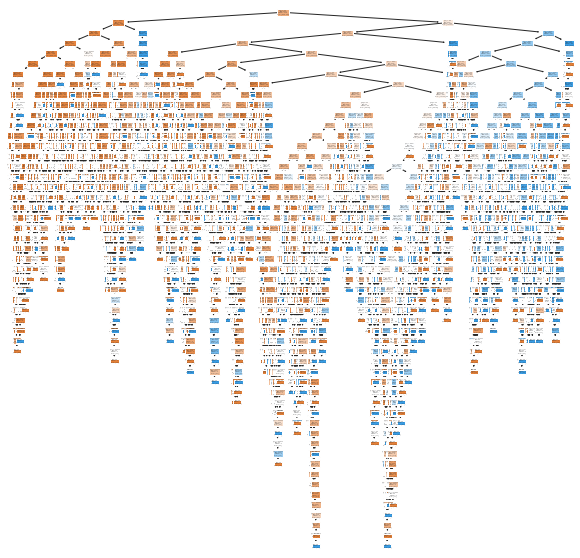

In [52]:
# Plot the tree
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True)
plt.show()


 > This picture is very complicated indicating a tree with enormous proportions
 
 > This indicates a high probability that the model has overfitted

### Make predictions on the test dataset

In [53]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)
print('Shape of the test_pred:', test_pred.shape)

Shape of the test_pred: (15060,)


### Construct the confusion matrix

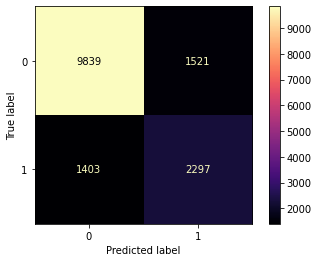

In [54]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### classification report

In [55]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



## Trail_2: Create the tree with pruning

### Creating and Training the model

In [56]:
# Define the model as a decision tree classifier with pruning in order to avoid overfitting
# The value of 0.001 for the pruning seems like a good spot for this particular model
clf = DecisionTreeClassifier(ccp_alpha=0.001)

In [57]:
# Train the model
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

In [58]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , clf.score(train_input, train_target))

D_Tree Train Score is :  0.8478996615568385


### Plot The Tree

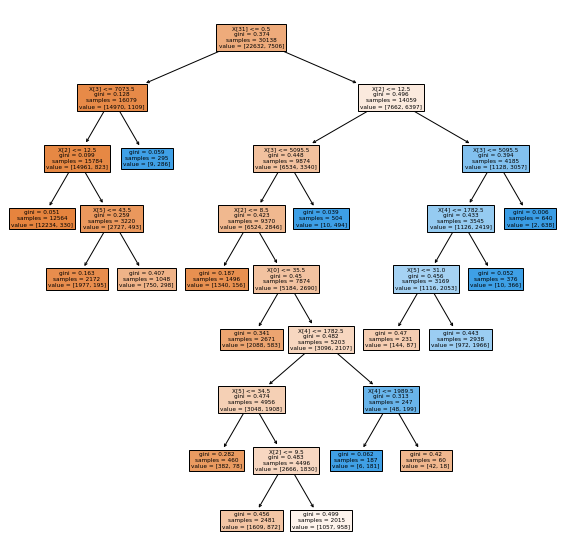

In [59]:
# Plot the tree
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True)
plt.show()


> This time th tree looks much more managable

### Make predictions on the test dataset

In [60]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)
print('Shape of the test_pred:', test_pred.shape)

Shape of the test_pred: (15060,)


### Construct the confusion matrix

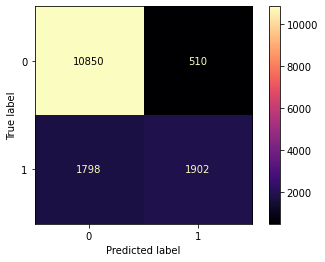

In [61]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### classification report

In [62]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



## Observation
> The accuracy jumped from 80% to 85% after pruning

> This confirms our suspicions that the first tree has overfitted

# RandomForestClassifier Model

## Trail_1: Create the basic model

### Creating and Training the model

In [63]:
# Initialize the model as a random forest classifier
clf = RandomForestClassifier()

In [64]:
# Train the model
clf.fit(train_input,train_target)

RandomForestClassifier()

In [65]:
#test the accuracy of model on training set
print('RandomForest Train Score is : ' , clf.score(train_input, train_target))

RandomForest Train Score is :  0.999900457893689


### Make predictions on the test dataset

In [66]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)
print('Shape of the test_pred:', test_pred.shape)

Shape of the test_pred: (15060,)


### Construct the confusion matrix

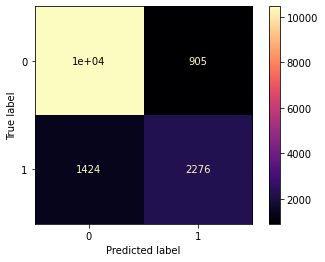

In [67]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### classification report

In [68]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



## Trail_2: Create the model with `n_estimators = 150`

### Creating and Training the model

In [69]:
# Initialize the model as a random forest classifier
clf = RandomForestClassifier(n_estimators = 150)

In [70]:
# Train the model
clf.fit(train_input,train_target)

RandomForestClassifier(n_estimators=150)

In [71]:
#test the accuracy of model on training set
print('RandomForest Train Score is : ' , clf.score(train_input, train_target))

RandomForest Train Score is :  0.9999668192978963


### Make predictions on the test dataset

In [72]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)
print('Shape of the test_pred:', test_pred.shape)

Shape of the test_pred: (15060,)


### Construct the confusion matrix

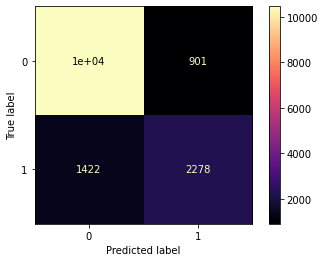

In [73]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### classification report

In [74]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



> The result is basically the same as before, so the additional trees didn't help at all

## Trail_3: Create the model with pruning

### Creating and Training the model

In [75]:
# Initialize the model as a random forest classifier
clf = RandomForestClassifier(ccp_alpha = 0.0001)

In [76]:
# Train the model
clf.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001)

In [77]:
#test the accuracy of model on training set
print('RandomForest Train Score is : ' , clf.score(train_input, train_target))

RandomForest Train Score is :  0.8775300285354038


### Make predictions on the test dataset

In [78]:
# get the predictions based on the test inputs
test_pred = clf.predict(test_input)
print('Shape of the test_pred:', test_pred.shape)

Shape of the test_pred: (15060,)


### Construct the confusion matrix

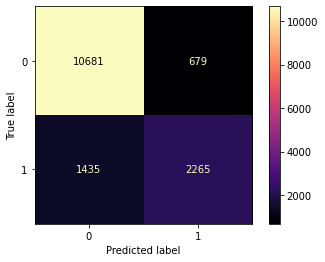

In [79]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    test_target, test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### classification report

In [80]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.61      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.85      0.86      0.85     15060



> A slight increase in accuracy however it is insignificant
 This is the limit of the performance on this dataset